# Numerical Methods 1
### [Gerard Gorman](http://www.imperial.ac.uk/people/g.gorman), [Matthew Piggott](http://www.imperial.ac.uk/people/m.d.piggott), [Nicolas Barral](http://www.imperial.ac.uk/people/n.barral)

# Lecture 2: Numerical Differentiation. Extra exercises

## Learning objectives:

* Learn about finite difference approximations to derivatives.
* Be able to implement forward and central difference methods.
* Calculate higher-order derivatives.
* Solve simple ODEs using the finite difference method.

## <span style="color:blue">Exercise: Write Taylor expansions</span>

Write the Taylor series expansion of the following functions to the order 5:
 - $f(x) = e^x$ in $x_0 = 0$
 - $f(x) = \frac{1}{1-x}$ in $x_0 = 0$
 - $f(x) = sin(x)$ in $x_0 = \pi$

## <span style="color:blue">Exercise: Write a finite difference scheme of $f'''$</span>

The third derivative of function f is noted $f'''(x) = f^{(3)}(x) = \frac{\mathrm{d}^3 f}{\mathrm{d}x^3}$.
Notice that $f'''(x) = g'(x)$ where $g(x)=f''(x)$. Use this remark to write a finite difference approximation of $f'''$ in $x_0$. Use central differencing for both first and second derivative approximations.

## <span style="color:blue">Exercise: Accuracy of forward Euler and Heun's methods</span>

Consider equation 
$$u'(t)=u(t),\quad u(0)=1\,.$$

Use the functions from Exercises 2.5 and 2.6 to plot the forward Euler and Heun's approximate solutions of this equation for different values of $h$.
Determine visually when both methods start to produce similar result.

Write a function *approx_error(f, u0, t0, t, h)* that returns the approximation error at a given time $t$ for both methods.

Using a while loop, compute the error at $t=3$ for $h$ from $1$ to $10^{-6}$, and plot it against h in logarithmic scale.

When does the difference between both approximate solutions at time $t=3$ start to be smaller than $10^{-3}$.

Populating the interactive namespace from numpy and matplotlib


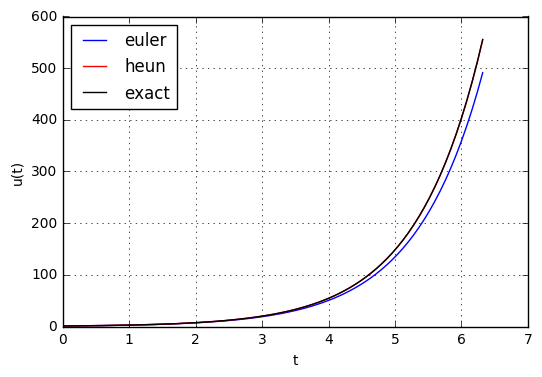

Euler forward and Heun's methods start to be similar for h = 3.1e-05


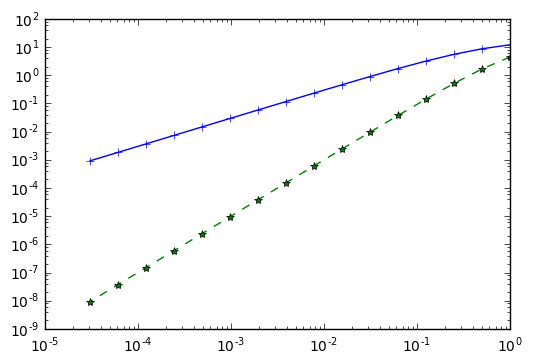

In [35]:
%pylab inline
import math

def euler(f,u0,t0,t_max,h):
    u=u0; t=t0; u_all=[u0]; t_all=[t0];
    while t<t_max:
        u = u + h*f(u,t)
        u_all.append(u)
        t = t + h
        t_all.append(t)
    return(u_all,t_all)

def heun(f,u0,t0,t_max,h):
    u=u0; t=t0; u_all=[u0]; t_all=[t0];
    while t<t_max:
        ue = u + h*f(u,t) # euler guess
        u = u + 0.5*h*(f(u,t) + f(ue,t+h))
        u_all.append(u)
        t = t + h
        t_all.append(t)
    return(u_all,t_all)

def f(u,t):
    val = u
    return val

h = 0.04
u0 = 1.0
t0 = 0.0
tf = 2*pi

(u_all,t_all) = euler(f,u0,t0,tf,h)
plot(t_all, u_all,'b',label='euler')
(u_all,t_all) = heun(f,u0,t0,tf,h)
plot(t_all, u_all,'r',label='heun')

plot(t_all, numpy.exp(t_all),'k',label='exact')
xlabel('t');ylabel('u(t)');grid(True);pylab.legend(loc='best')
show()


def approx_error(h, t_max):
    uall, tall =   euler(f,u0,t0,t_max,h)
    error_euler = abs(uall[-1]-exp(t_max))
    uall, tall =   heun(f,u0,t0,t_max,h)
    error_heun = abs(uall[-1]-exp(t_max))
    return error_euler, error_heun

erre = []
errh = []
h_array = []
h = 1
while h > 0.00001:
    h_array.append(h)
    err1, err2 = approx_error(h, 3)
    erre.append(err1)
    errh.append(err2)
    if abs(err1 - err2) < 0.001: 
        print "Euler forward and Heun's methods start to be similar for h = %1.1e" % h
        break
    h  *= 0.5


loglog(h_array, erre, '+-', h_array, errh, '*--')
show()

## <span style="color:blue">Exercise: Study a function and its derivative [Langtangen B.3]</span>

Consider the function:
$$ u(x) = \sin\left(\frac{1}{x+\epsilon}\right)$$ 
for x ranging from 0 to 1, and the derivative
$$u'(x) = \frac{-\cos({\frac{1}{x+\epsilon}})}{(x+\epsilon)^2} $$
Here, $\epsilon$ is a given input parameter.


Make sure you can find the expression of $u'(x)$ by pen and paper.

Let us subdivide interval $[0,1]$ into n points $x_0=0, ..., x_{n-1}=1$.
Write a function *plot_derivatives(epsilon, n)* that returns three arrays:
  x_array contains the coordinates of the $n$ points
  derivative_exact contains the exact derivative given by $u' = u'(x)$  above
  derivative_fd contains an approximate derivative obtained with a finite difference method. Use a central differencing method for inner points, and a forward (resp. backward) differencing for the first (resp. last) points.
This function should also plot these two derivatives against x.

Test the function using $n = 10$ and $\epsilon= 1/5$.

How large do you have to choose $n$ in order for the difference between
these two functions to be less than 0.1? 
Hint: Compute the error for each point, and look at the max of these errors. 

Let $\epsilon = 1/10$ and $1/20$, and repeat previous question.

Try to determine experimentally how large $n$ needs to be for a given
value of $\epsilon$ such that increasing n further does not change the plot
so much that you can view it on the screen. Note, that there
is no exact solution to this problem.

## <span style="color:blue">Exercise: Experimental data [Kiusalaas A.15]</span>

The relationship between the stress $\sigma$ and the strain $\epsilon$ of some biological materials in uniaxial tension is

$$
\frac{\mathrm{d}\sigma}{\mathrm{d}\epsilon} = a + b\sigma
$$

where a and b are constants. 

The following table gives experimental data for the stress and strain of such a material:  
<table>
<tr><td>Strain $\epsilon$  </td><td> Stress $\sigma$ (MPa) </td></tr> 
<tr><td>0      </td><td>    0      </td></tr>
<tr><td>0.05   </td><td>    0.252  </td></tr>
<tr><td>0.10   </td><td>    0.531  </td></tr>
<tr><td>0.15   </td><td>    0.840  </td></tr>
<tr><td>0.20   </td><td>    1.184  </td></tr>
<tr><td>0.25   </td><td>    1.558  </td></tr>
<tr><td>0.30   </td><td>    1.975  </td></tr>
<tr><td>0.35   </td><td>    2.444  </td></tr>
<tr><td>0.40   </td><td>    2.943  </td></tr>
<tr><td>0.45   </td><td>    3.500  </td></tr>
<tr><td>0.50   </td><td>    4.115  </td></tr>
</table>

Write a program that computes and plots the tangent modulus $\mathrm{d}\sigma/\mathrm{d}\epsilon$ versus $\sigma$.

Using [Lecture 1](http://nbviewer.jupyter.org/github/ggorman/Numerical-methods-1/blob/master/notebook/interpolation.ipynb) compute the parameters $a$ and $b$ by linear regression (*i.e.* fit a straight line, (a polynomial of degree ...) to the data).
